In [119]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

In [136]:
dataset_id=53 # 46
dataset=fetch_ucirepo(id=dataset_id)



In [137]:
dataset.data.keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [138]:
X=pd.DataFrame(dataset.data.features)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [139]:
Y=pd.DataFrame(dataset.data.targets)
Y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [157]:
Y["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Pre Processing

In [140]:
Y.isnull().sum()
# no null values in output
# print(Y.size)->155

class    0
dtype: int64

In [158]:
# count for null values in columns
na_cols=[]
cols=X.columns

for col in cols:
    current_col=X[col]
    na_count=current_col.isna().sum()
    if na_count>0:
        na_cols.append(col)


print(f"columns with null values:\n{na_cols}")


columns with null values:
[]


In [159]:
# null values before replacing with median
X.isna().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
dtype: bool

In [161]:

for na_col in na_cols:
    na_mask=X[na_col].isna()==True
    X.loc[na_mask,na_col]=X[na_col].median()
    
   

    

In [162]:
# after replace
X.isna().any()



sepal length    False
sepal width     False
petal length    False
petal width     False
dtype: bool

In [163]:
X.shape

(150, 4)

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_outliers(X: pd.DataFrame):
    num_cols = len(X.columns)
    num_rows = math.ceil(num_cols / 3)  
    
    plt.figure(figsize=(15, num_rows * 4))
    
    for i, col in enumerate(X.columns, 1):
        if X[col].dtype in ['int64', 'float64']: 
            plt.subplot(num_rows, 3, i) 
            sns.boxplot(x=X[col])
            plt.title(f'Boxplot of {col}')
            plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()



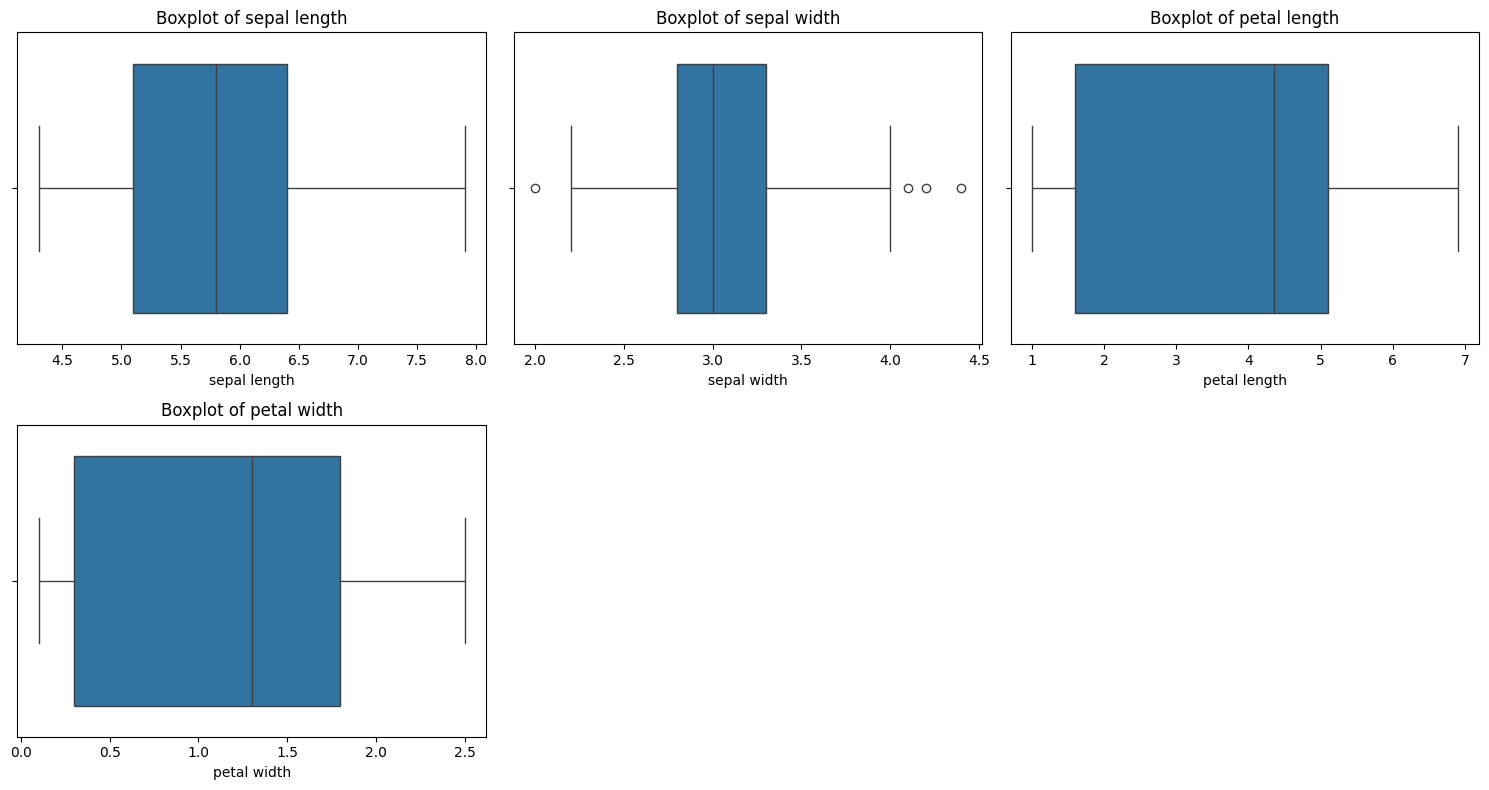

In [167]:
plot_outliers(X)

In [168]:
import pandas as pd

def remove_outliers(X: pd.DataFrame) -> pd.DataFrame:
    print(X.shape)
    for col in X.columns:
        if X[col].dtype in ['int64', 'float64']: 
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.7)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            
            X= X[(X[col] >= lower_bound) & (X[col] <= upper_bound)]
            
            
    print(X.shape)
    return X


(150, 4)
(143, 4)


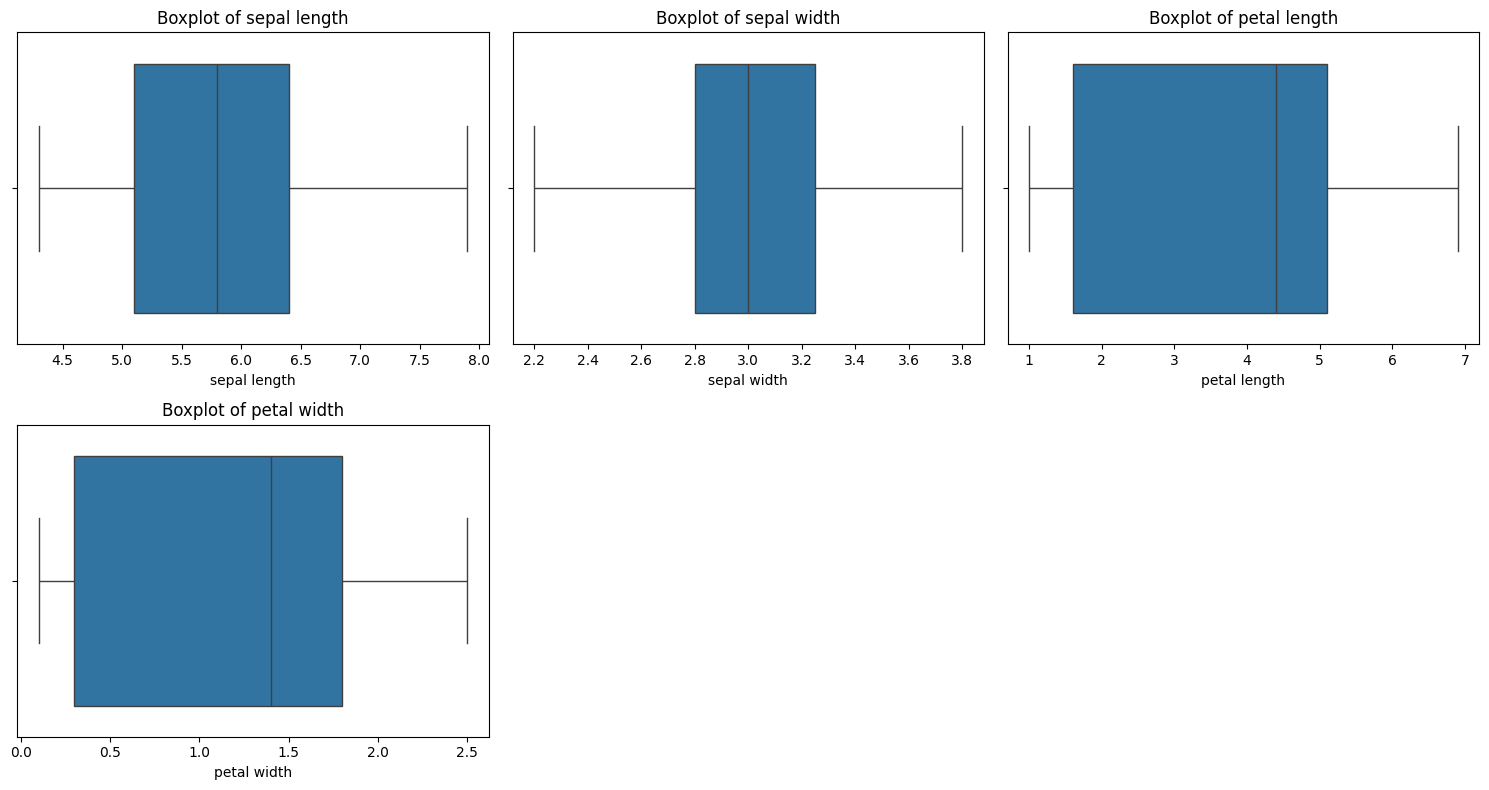

In [170]:

X=remove_outliers(X)

plot_outliers(X)

In [171]:
X.shape

(143, 4)

# MODEL BUILDING

In [172]:
classes=Y["class"].unique()
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)